In [41]:
import numpy as np
import sounddevice as sd
import signalTeste as st
import argparse
import queue
import sys
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
import numpy as np
import sounddevice as sd
import time

In [42]:
teste = st.signalMeu()
timer = 1
fs = 44100
timeParser = 1000
sd.default.samplerate = fs
listSEN1 = [697,770,852,941]
listSEN2 = [1209,1366,1477]
listValues=[['1','2','3'],['4','5','6'],['7','8','9'],['*','0','#']]

In [43]:
duration = 5  # seconds
sd.default.samplerate = fs
sd.default.channels = 2

In [44]:
#Gerar o som, retorna uma lista de 4 listas sendo x e y de cada uma das senóides
def playTheSound(intOfSound):
    a =  {
        '0':(teste.generateSin(941,1,timer,fs)+teste.generateSin(1366,1,timer,fs)),
        '1':(teste.generateSin(697,1,timer,fs)+teste.generateSin(1209,1,timer,fs)),
        '2':(teste.generateSin(1336,1,timer,fs)+teste.generateSin(697,1,timer,fs)),
        '3':(teste.generateSin(697,1,timer,fs)+teste.generateSin(1477,1,timer,fs)),
        '4':(teste.generateSin(770,1,timer,fs)+teste.generateSin(1209,1,timer,fs)),
        '5':(teste.generateSin(770,1,timer,fs)+teste.generateSin(1336,1,timer,fs)),
        '6':(teste.generateSin(770,1,timer,fs)+teste.generateSin(1477,1,timer,fs)),
        '7':(teste.generateSin(852,1,timer,fs)+teste.generateSin(1209,1,timer,fs)),
        '8':(teste.generateSin(852,1,timer,fs)+teste.generateSin(1336,1,timer,fs)),
        '9':(teste.generateSin(852,1,timer,fs)+teste.generateSin(1477,1,timer,fs)),
        '#':(teste.generateSin(941,1,timer,fs)+teste.generateSin(1477,1,timer,fs)),
        '*':(teste.generateSin(941,1,timer,fs)+teste.generateSin(1209,1,timer,fs))
    }.get(intOfSound, None)
    if a != None:
        sd.play(a[1]+a[3])
        return a
    else:
        return [None]
    
def soundFinder(som):
    fourier = teste.calcFFT(som.T[1],fs)
    sen1 = np.argmax(fourier[1])
    fourier[1][sen1]=0
    a=0
    while True:
        fourier[1][np.argmax(fourier[1])]=0

        if sen1-np.argmax(fourier[1]) > 10 or np.argmax(fourier[1])-sen1 > 10:
            sen2 = np.argmax(fourier[1])
            for i in range(0,len(listSEN1)):
                if sen1 >= listSEN1[i]*0.99 and sen1 <= listSEN1[i]*1.01 or sen2 >= listSEN1[i]*0.99 and sen2 <= listSEN1[i]*1.01:
                    for k in range(0,len(listSEN2)):
                        if sen1 >= listSEN2[k]*0.99 and sen1 <= listSEN2[k]*1.01 or sen2 >= listSEN2[k]*0.99 and sen2 <= listSEN2[k]*1.01:
                            resulti = listValues[i][k]
                            return resulti
            return None
            
            
        else:
            a+=1
            if a==500:
                return None

4



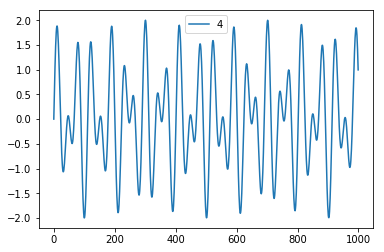

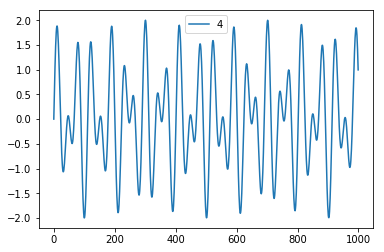

In [45]:
rodandoSom = True
fig, ax = plt.subplots()
while rodandoSom:
    numero = input() 
    a = playTheSound(numero)
    if a == [None]:
        rodandoSom = False
    else:
        ax.plot(a[1][0:1000]+a[3][0:1000], label=numero)
        time.sleep (0.2);
        plt.figure()
        plt.plot(a[1][0:1000]+a[3][0:1000],label=numero)
        plt.legend(numero)
ax.legend()

<Figure size 432x288 with 0 Axes>

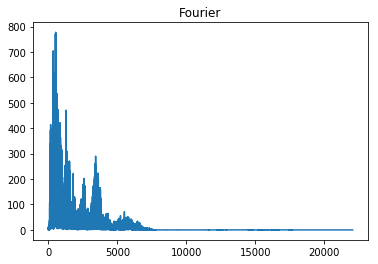

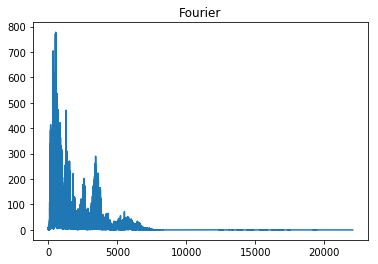

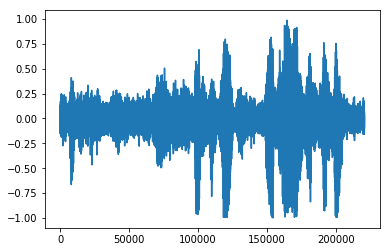

In [46]:
myrecording = sd.rec(int(duration * fs), channels=2)
sd.wait()
plt.figure()
teste.plotFFT(myrecording.T[1],fs)
teste.plotFFT(myrecording.T[0],fs)
plt.figure()
plt.plot(myrecording.T[0])
fourier = teste.calcFFT(myrecording.T[0],fs)

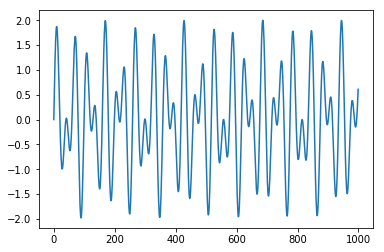

In [34]:
testeasddf = teste.generateSin(852,1,timer,fs)+teste.generateSin(1366,1,timer,fs)
outroteste = testeasddf[1]+testeasddf[3]
plt.plot(outroteste[0:1000])
fourierTeste = teste.calcFFT(outroteste,fs)

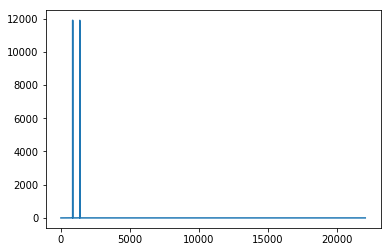

In [35]:
plt.plot(fourierTeste[0],fourierTeste[1])

In [36]:
sen = soundFinder(outroteste)
print(sen)

8


In [48]:
duration = 1
testy = 0
while True:
    ambiente = sd.rec(int(duration * fs), channels=2)
    sd.wait()
    resultadoFinder = soundFinder(ambiente)
    print("oi :) ")
    if not resultadoFinder == None:
        print("Call: ",resultadoFinder)    
    if testy==10:
        break
    testy+=1

oi :) 
oi :) 
oi :) 
oi :) 
oi :) 
oi :) 
oi :) 
oi :) 
oi :) 
oi :) 
oi :) 
